In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [4]:
dl = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Regression\Logistic\diabetesLogistic.csv')

In [5]:
dl.shape

(768, 9)

In [6]:
dl.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dl.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dl_train, dl_test = train_test_split(dl, test_size=.2)

In [10]:
dl_train_x = dl_train.iloc[:, 0:-1]
dl_train_y = dl_train.iloc[:, -1]

dl_test_x = dl_test.iloc[:, 0:-1]
dl_test_y = dl_test.iloc[:, -1]

In [11]:
dl_train_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
278,5,114,74,0,0,24.9,0.744,57
501,3,84,72,32,0,37.2,0.267,28
333,12,106,80,0,0,23.6,0.137,44
335,0,165,76,43,255,47.9,0.259,26
743,9,140,94,0,0,32.7,0.734,45


In [12]:
logreg = LogisticRegression()

In [13]:
logreg.fit(dl_train_x, dl_train_y)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
pred = logreg.predict(dl_test_x)

In [15]:
tab1 = confusion_matrix(dl_test_y, pred)
tab1

array([[95, 10],
       [26, 23]], dtype=int64)

In [16]:
Accuracy = tab1.diagonal().sum()*100/tab1.sum()
Accuracy

76.62337662337663

In [17]:
FPR = tab1[0,1]*100/tab1[0].sum()
FPR

9.523809523809524

In [19]:
TPR = recall_score(dl_test_y, pred)*100
TPR

46.93877551020408

In [20]:
Precision = precision_score(dl_test_y, pred)*100
Precision

69.6969696969697

In [21]:
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [22]:
F1 = f1_score(dl_test_y, pred)
F1

0.5609756097560976

In [23]:
pred_prob = logreg.predict_proba(dl_test_x)
pred_prob

array([[0.92193264, 0.07806736],
       [0.32486608, 0.67513392],
       [0.20633582, 0.79366418],
       [0.1807408 , 0.8192592 ],
       [0.59104035, 0.40895965],
       [0.74264161, 0.25735839],
       [0.70416403, 0.29583597],
       [0.78112928, 0.21887072],
       [0.36374154, 0.63625846],
       [0.27108908, 0.72891092],
       [0.76648304, 0.23351696],
       [0.91285516, 0.08714484],
       [0.84563617, 0.15436383],
       [0.92473317, 0.07526683],
       [0.92963892, 0.07036108],
       [0.96622711, 0.03377289],
       [0.73932943, 0.26067057],
       [0.31234866, 0.68765134],
       [0.96608817, 0.03391183],
       [0.73037254, 0.26962746],
       [0.81295481, 0.18704519],
       [0.78959658, 0.21040342],
       [0.77854689, 0.22145311],
       [0.99561712, 0.00438288],
       [0.85662819, 0.14337181],
       [0.87507644, 0.12492356],
       [0.94910512, 0.05089488],
       [0.39847508, 0.60152492],
       [0.7689248 , 0.2310752 ],
       [0.42736304, 0.57263696],
       [0.

In [24]:
roc_auc_score(dl_test_y, pred_prob[:,1])
# area under roc curve

0.812050534499514

In [26]:
fpr,tpr, threshold = roc_curve(dl_test_y, pred_prob[:,1])

In [27]:
import matplotlib.pyplot as plt

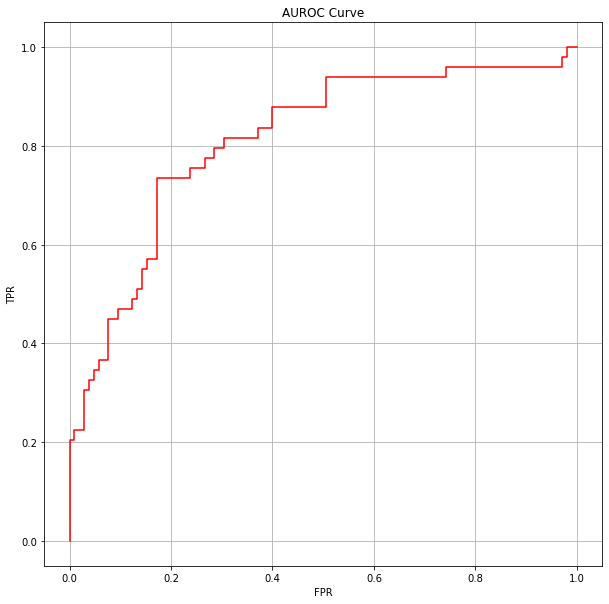

In [28]:
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color= 'r')
plt.title('AUROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()